In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.csv',
                index_col=0)

In [3]:
df.head()

,classI,classII,Tissue,Age,Race,homozygous_classI,homozygous_classII,homozygous_total,passenger_coverageI,passenger_coverageII,classI_cat,classII_cat,classI_het,classII_het
TCGA-02-0003,0.169941,0.073674,GBM,50.0,WHITE,0.0,1.0,1.0,0.169956,0.097588,other,other,het,het
TCGA-02-0033,0.184676,0.066798,GBM,54.0,WHITE,0.0,2.0,2.0,0.155702,0.094298,high,other,het,het
TCGA-02-0047,0.120825,0.085462,GBM,78.0,WHITE,2.0,1.0,3.0,0.164474,0.104167,low,high,homo,het
TCGA-02-0055,0.152259,0.066798,GBM,62.0,WHITE,0.0,2.0,2.0,0.166667,0.080044,low,other,het,het
TCGA-02-2466,0.181729,0.075639,GBM,61.0,WHITE,0.0,1.0,1.0,0.174342,0.093202,other,other,het,het


In [4]:
muts = pd.read_csv('/cellar/users/ramarty/Data/hla/mutations/processed_mutation_files.full_tcga.csv',
                   index_col=0)

In [5]:
mut_counts = pd.DataFrame(muts.Barcode.value_counts())
mut_counts.columns = ['mutation_burden']

In [6]:
df = pd.merge(df, mut_counts, left_index=True, right_index=True, how='inner')

In [7]:
df.to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.with_mutation_burden.csv')

In [8]:
df.head()

,classI,classII,Tissue,Age,Race,homozygous_classI,homozygous_classII,homozygous_total,passenger_coverageI,passenger_coverageII,classI_cat,classII_cat,classI_het,classII_het,mutation_burden
TCGA-A5-A0G2,0.151277,0.078585,UCEC,57.0,ASIAN,1.0,0.0,1.0,0.161184,0.096491,low,high,other,het,23335
TCGA-FW-A3R5,0.184676,0.080550,SKCM,68.0,WHITE,0.0,0.0,0.0,0.177632,0.101974,high,high,het,het,14741
TCGA-IB-7651,0.216110,0.078585,PAAD,64.0,WHITE,0.0,0.0,0.0,0.160088,0.101974,high,high,het,het,13485
TCGA-FI-A2D5,0.161100,NaN,UCEC,56.0,WHITE,NaN,NaN,NaN,NaN,NaN,other,other,other,homo,13180
TCGA-AP-A0LM,0.153242,NaN,UCEC,33.0,BLACK OR AFRICAN AMERICAN,NaN,NaN,NaN,NaN,NaN,other,other,other,homo,12406


In [14]:
correlation = []
for tissue in df.Tissue.unique():
    print tissue
    try:
        df_tissue = df[df.Tissue == tissue].dropna()
        #sns.jointplot(df_tissue.classI, df_tissue.mutation_burden, stat_func=sp.spearmanr)
        #plt.show()
        #plt.clf()
        correlation.append(sp.spearmanr(df_tissue.classI, df_tissue.mutation_burden)[0])
    except:
        print tissue

UCEC
SKCM
PAAD
GBM
LGG
READ
COAD
PRAD
STAD
BRCA
OV
UCS
BLCA
LUSC
HNSC
LUAD
ACC
LAML
LIHC
KIRP
CESC
SARC
KICH
THCA
KIRC
UVM
DLBC
MESO
TGCT
PCPG
nan


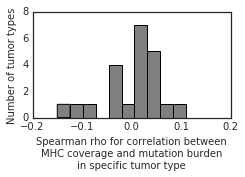

In [27]:
plt.figure(figsize=(3.5, 2.5))
ax = pd.Series(correlation).dropna().hist(color='grey')
ax.grid(False)
plt.xlim(-0.2, 0.2)
plt.xlabel('Spearman rho for correlation between\nMHC coverage and mutation burden\nin specific tumor type')
plt.ylabel('Number of tumor types')
plt.locator_params(nbins=5)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/coverage_mutation_correlation.pdf')